# Problem

Given the following data set, can you plot a chart that shows the percent of revenue by marketing source?


    
You can assume that purchase_value is revenue in this case, and you'll have to calculate the percent of revenue by source prior to plotting.

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
sales = pd.read_excel('salesdata.xlsx')

In [3]:
df = sales.copy()

In [4]:
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [5]:
df.shape

(61096, 11)

So we know we have 11 columns of data with over 61,000 rows. However, the only columns of interest to us for this problem is the purchase value and the source columns.  We can reduce the dataframe so it contains only these columns.

In [6]:
df = df[['purchase_value', 'source']]

In [7]:
df.head()

,purchase_value,source
0,34,SEO
1,16,Ads
2,15,SEO
3,44,SEO
4,39,Ads


In [8]:
### Solution: Plotting Percent Revenue by Source

In [9]:
def histogram_boxplot(data, xlabel=None, title=None, font_scale=2, figsize=(15,7), bins=None):
    mean = np.mean(data)
    
    sns.set(font_scale=font_scale) # setting the font scale of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)}, figsize=figsize)
    sns.boxplot(data, ax=ax_box2, showmeans=True,color="violet") #boxplot will be created and a star will indicate the mean value
    sns.distplot(data,kde=False, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(data,kde=False, ax=ax_hist2, bins=None)
    ax_hist2.axvline(mean, color='g', linestyle='--') #mean will show as vertical line in the histogram
    if xlabel: ax_hist2.set(xlabel=xlabel) #xlabel
    if title: ax_box2.set(title=title) # title of the graph
    plt.show() # for plotting the graph

In [10]:
def perc_on_bar(plot, feature):
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x,y), size = 20) # annotate the percentage
    plt.show() # shows the plot

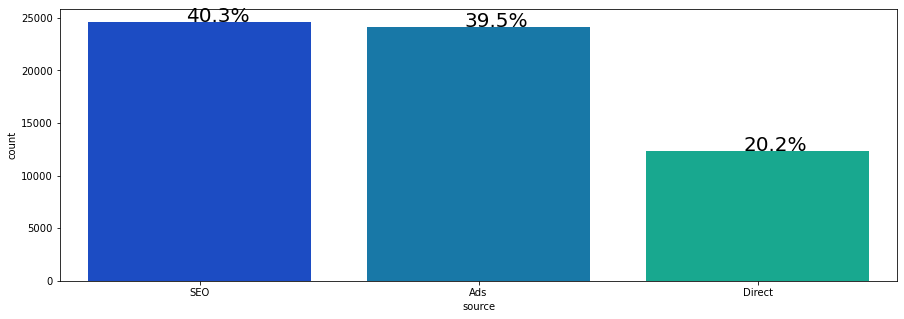

In [11]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df['source'], palette='winter')
perc_on_bar(ax,df['purchase_value'])

The above chart shows bars of number of sales by source with the percentage of revenue by source superimposed above each bar. We can see that SEO and Ads contributed about 40% of revenue, each, while Direct accounted for just over 20%

### Alternate Solution: Pivot Tables

In [12]:
df_pivot = df.groupby(['source']).sum().sort_values(['purchase_value'], ascending=[False]).reset_index()

In [13]:
df_pivot['percent'] = df_pivot['purchase_value']/df_pivot.purchase_value.sum()

In [14]:
df_pivot

,source,purchase_value,percent
0,SEO,906722,0.401946
1,Ads,889934,0.394504
2,Direct,459174,0.203550


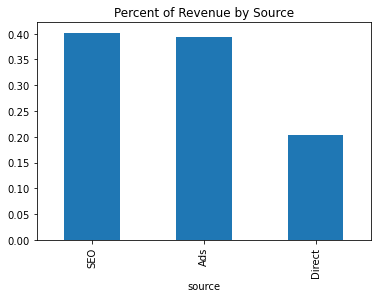

In [15]:
ax = df_pivot.plot(x='source', y='percent', kind='bar', legend=False, title='Percent of Revenue by Source')

The above bar graph shows a breakdown of revenue by each sorce as a percent of total revenue